# Reversible Truth Tables

In [276]:
import numpy as np
import time
import random

In [285]:
input_headers = ['x', 'y']
output_headers = ['output1', 'output2', 'output3']
input = np.array([[0,0], [0,1], [1,0], [1,1]])
output = np.array([[0,0,0], [0,1,0], [0,1,1], [1,0,0]])

full_add_input_headers = ['cin', 'x', 'y']
full_add_output_headers = ['cout', 'sum']
full_add_input = np.array([[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1],])
full_add_output = np.array([[0,0], [0,1], [0,1], [1,0], [0,1], [1,0], [1,0], [1,1]])

In [286]:
def printTruthTable(input, output, input_headers, output_headers):
    row_num = 0
    header = "|"

    for col in range(input.shape[1]):
        header = header + input_headers[col] + "|"
    header = header + "|"
    
    for col in range(output.shape[1]):
        header = header + output_headers[col] + "|"
    
    div = ""
    for i in header:
        div += "-"
        
    print(header)
    print(div)
    
    for row in input:
        line = "|"
        for i, index in enumerate(row):
            space = ""
            for item in range(len(input_headers[i])):
                space += ""
            line = line + str(index) + space + "|"
        line = line + "|"
        for i, index in enumerate(output[row_num]):
            space = ""
            for item in range(len(output_headers[i])):
                space += ""
            line = line + str(index) + space + "|"
        print(line)
        row_num += 1
    
get_bin = lambda x, n: format(x, 'b').zfill(n)

In [287]:
printTruthTable(input, output, input_headers, output_headers)

|x|y||output1|output2|output3|
------------------------------
|0|0||0|0|0|
|0|1||0|1|0|
|1|0||0|1|1|
|1|1||1|0|0|


In [288]:
from pandas import *

def duplicate(decodeArray):
    seen = set()
    newList = []
    for item in decodeArray:
        t = tuple(item)
        if t not in seen: 
            newList.append(item)
            seen.add(t)
    return newList

def isReversible(input, output):
    if input.shape == output.shape:
        # check if one to one
        seen = set()
        unique_rows = []
        for item in output:
            t = tuple(item)
            if t not in seen: 
                unique_rows.append(item)
                seen.add(t)
        unique_rows = np.array(unique_rows)
        return unique_rows.shape == output.shape
    else:
        return False
    


In [289]:
isReversible(input, output)

False

In [354]:
def reverse(input, output, input_headers, output_headers, dict={}):
    max_key = max(dict, key= lambda x: len(set(dict[x])))
    num_garbage = len(dict[max_key])
#     print("Duplicate Key: ",max_key)
    
    num_garbage = len("{0:b}".format(num_garbage))
#     print("Number of garbage bits needed: ", num_garbage)
    num_antica = (num_garbage + output.shape[1]) - input.shape[1]
#     print("Number of antica bits needed: ", num_antica)

    # makes onto
    new_input = np.hstack((input, np.zeros((input.shape[0], num_antica), dtype=input.dtype)))
    new_input_headers = input_headers
    for i in range(num_antica):
        new_input_headers.append("a"+ str(i))
    new_output = np.hstack((output, np.zeros((output.shape[0], num_garbage), dtype=input.dtype)))
    new_output_headers = output_headers
    for i in range(num_garbage):
        new_output_headers.append("g"+ str(i))
        
    #make one to one
    new_output = synthesize(new_output, num_antica, num_garbage, dict)
    return (new_input, new_output, new_input_headers, new_output_headers, num_antica, num_garbage)

def synthesize(output, num_antica, num_garbage, duplicates={}):
    buffer = output.shape[1] - num_garbage
    get_bin = lambda x, n: format(x, 'b').zfill(n)
    
    for key in duplicates:
        number = 1
        for item in duplicates[key]:
            garbage = get_bin(number, num_garbage)
            for col in range(num_garbage):
                output[item][col+buffer] = int(garbage[col])
            number = number + 1
                        
    return (output)

def makeReversible(input, output, input_headers, output_headers): 
    seen = set()
    duplicates = {}
    index = 0 
    for row in output:
        t = tuple(row)
        if t in seen:
            if t in duplicates:
                duplicates[t].append(index)
            else:
                duplicates[t] = [index]
        seen.add(t)
        index += 1    
    
    if isReversible(input, output):
        print("Truth Table already reversible")
        return (input, output, input_headers, output_headers, 0, 0)
    else:
        if len(duplicates) > 0:
            return reverse(input, output, input_headers, output_headers, duplicates)
        else:
            columns = input.shape[1] - output.shape[1]
            new_input_headers = input_headers
            new_input = np.hstack((input, np.zeros((input.shape[0], abs(columns)), dtype=input.dtype)))
            for i in range(abs(columns)):
                new_input_headers.append("a"+ str(i))
            return (new_input, output, new_input_headers, output_headers, abs(columns), 0)

    
    

In [309]:
print(output.shape)
new_input, new_output, new_input_headers, new_output_headers, num_antica, num_garbage =  makeReversible(input, output, input_headers, output_headers)
printTruthTable(input, output, input_headers, output_headers)
printTruthTable(new_input, new_output, new_input_headers, new_output_headers)
isReversible(new_input, new_output)

(256, 4)
Duplicate Key:  (0, 1, 0, 0)
Number of garbage bits needed:  7
Number of antica bits needed:  3
|a|b|c|d|e|f|g|h||o1|o2|o3|o4|
------------------------------
|0|0|0|0|0|0|0|0||0|0|0|0|
|0|0|0|0|0|0|0|1||0|0|0|1|
|0|0|0|0|0|0|1|0||0|0|0|1|
|0|0|0|0|0|0|1|1||0|0|1|0|
|0|0|0|0|0|1|0|0||0|0|0|1|
|0|0|0|0|0|1|0|1||0|0|1|0|
|0|0|0|0|0|1|1|0||0|0|1|0|
|0|0|0|0|0|1|1|1||0|0|1|1|
|0|0|0|0|1|0|0|0||0|0|0|1|
|0|0|0|0|1|0|0|1||0|0|1|0|
|0|0|0|0|1|0|1|0||0|0|1|0|
|0|0|0|0|1|0|1|1||0|0|1|1|
|0|0|0|0|1|1|0|0||0|0|1|0|
|0|0|0|0|1|1|0|1||0|0|1|1|
|0|0|0|0|1|1|1|0||0|0|1|1|
|0|0|0|0|1|1|1|1||0|1|0|0|
|0|0|0|1|0|0|0|0||0|0|0|1|
|0|0|0|1|0|0|0|1||0|0|1|0|
|0|0|0|1|0|0|1|0||0|0|1|0|
|0|0|0|1|0|0|1|1||0|0|1|1|
|0|0|0|1|0|1|0|0||0|0|1|0|
|0|0|0|1|0|1|0|1||0|0|1|1|
|0|0|0|1|0|1|1|0||0|0|1|1|
|0|0|0|1|0|1|1|1||0|1|0|0|
|0|0|0|1|1|0|0|0||0|0|1|0|
|0|0|0|1|1|0|0|1||0|0|1|1|
|0|0|0|1|1|0|1|0||0|0|1|1|
|0|0|0|1|1|0|1|1||0|1|0|0|
|0|0|0|1|1|1|0|0||0|0|1|1|
|0|0|0|1|1|1|0|1||0|1|0|0|
|0|0|0|1|1|1|1|0||0|1|0

|0|1|0|0|1|0|1|1|0|0|0||0|1|0|0|0|0|1|0|0|0|0|
|0|1|0|0|1|1|0|0|0|0|0||0|0|1|1|0|0|1|1|0|0|1|
|0|1|0|0|1|1|0|1|0|0|0||0|1|0|0|0|0|1|0|0|0|1|
|0|1|0|0|1|1|1|0|0|0|0||0|1|0|0|0|0|1|0|0|1|0|
|0|1|0|0|1|1|1|1|0|0|0||0|1|0|1|0|0|0|0|1|1|0|
|0|1|0|1|0|0|0|0|0|0|0||0|0|1|0|0|0|1|0|0|1|1|
|0|1|0|1|0|0|0|1|0|0|0||0|0|1|1|0|0|1|1|0|1|0|
|0|1|0|1|0|0|1|0|0|0|0||0|0|1|1|0|0|1|1|0|1|1|
|0|1|0|1|0|0|1|1|0|0|0||0|1|0|0|0|0|1|0|0|1|1|
|0|1|0|1|0|1|0|0|0|0|0||0|0|1|1|0|0|1|1|1|0|0|
|0|1|0|1|0|1|0|1|0|0|0||0|1|0|0|0|0|1|0|1|0|0|
|0|1|0|1|0|1|1|0|0|0|0||0|1|0|0|0|0|1|0|1|0|1|
|0|1|0|1|0|1|1|1|0|0|0||0|1|0|1|0|0|0|0|1|1|1|
|0|1|0|1|1|0|0|0|0|0|0||0|0|1|1|0|0|1|1|1|0|1|
|0|1|0|1|1|0|0|1|0|0|0||0|1|0|0|0|0|1|0|1|1|0|
|0|1|0|1|1|0|1|0|0|0|0||0|1|0|0|0|0|1|0|1|1|1|
|0|1|0|1|1|0|1|1|0|0|0||0|1|0|1|0|0|0|1|0|0|0|
|0|1|0|1|1|1|0|0|0|0|0||0|1|0|0|0|0|1|1|0|0|0|
|0|1|0|1|1|1|0|1|0|0|0||0|1|0|1|0|0|0|1|0|0|1|
|0|1|0|1|1|1|1|0|0|0|0||0|1|0|1|0|0|0|1|0|1|0|
|0|1|0|1|1|1|1|1|0|0|0||0|1|1|0|0|0|0|0|0|0|1|
|0|1|1|0|0|0|

True

In [38]:


times = []
build_times = []
n_vals = [2,3,6,8,10,12,16,20]
for n in n_vals:
    print(n)
    start = time.time()
    input = []
    output = []
    input_headers = []
    output_headers = []
    for i in range(2**n):
        input.append(list(map(int, get_bin(i, n))))

    for i in range(2**n):
        output.append(list(map(int, get_bin(0, n))))

    for i in range(n):
        input_headers.append('x')
        output_headers.append('y')

    input = np.array(input)
    output = np.array(output)
    end = time.time()
    build_time = end - start
    print("Build Time: ", build_time)

    start = time.time()
    new_input, new_output, new_input_headers, new_output_headers = makeReversible(input, output, input_headers, output_headers)
    end = time.time()

    times.append(end - start)
    build_times.append(build_time)
        


2
Build Time:  6.723403930664062e-05
Number of garbage bits needed: 2
Number of antica bits needed: 2
3
Build Time:  7.009506225585938e-05
Number of garbage bits needed: 3
Number of antica bits needed: 3
6
Build Time:  0.0003628730773925781
Number of garbage bits needed: 6
Number of antica bits needed: 6
8
Build Time:  0.003271341323852539
Number of garbage bits needed: 8
Number of antica bits needed: 8
10
Build Time:  0.009768009185791016
Number of garbage bits needed: 10
Number of antica bits needed: 10
12
Build Time:  0.03047013282775879
Number of garbage bits needed: 12
Number of antica bits needed: 12
16
Build Time:  0.7624020576477051
Number of garbage bits needed: 16
Number of antica bits needed: 16
20
Build Time:  11.747115850448608
Number of garbage bits needed: 20
Number of antica bits needed: 20


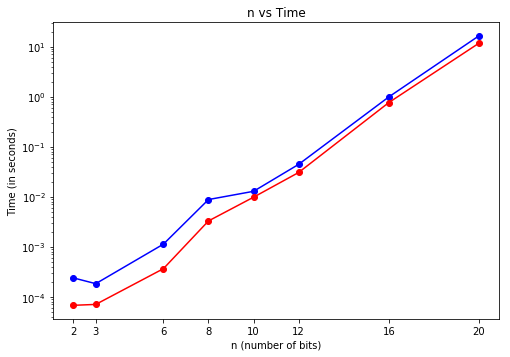

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

plt.figure(1, figsize=(8, 12))
# Plot 1
plt.subplot(211)
x_val = ['']
x = np.array(n_vals)
plt.xticks(x, n_vals)
plt.plot(x, times, 'b-o')
xnew = np.linspace(x.min(),x.max(),300) 

# power_smooth = spline(x,times,xnew)

# plt.plot(xnew,power_smooth, 'r--')
plt.yscale('log')
plt.ylabel('Time (in seconds)')
plt.xlabel('n (number of bits)')
plt.title('n vs Time')

# Plot 2
# plt.subplot(212)
x_val = ['']
x = np.array(n_vals)
plt.xticks(x, n_vals)
plt.plot(x, build_times, 'r-o')
xnew = np.linspace(x.min(),x.max(),300) 

# power_smooth = spline(x,build_times,xnew)

# plt.plot(xnew,power_smooth, 'r--')
plt.yscale('log')
plt.ylabel('Time (in seconds)')
plt.xlabel('n (number of bits)')
plt.title('n vs Time')

plt.show()

In [292]:
def getOutput(item, hash, output_hash):
    outputs = []
    for h in range(0,len(hash)):
        output = []
        for i in range(0,len(item)):
            output.append(item[i] ^ hash[h][i])
        if 1 not in output:
            outputs.append(output_hash[h])
    
    if len(outputs) > 0:
        or_outputs = np.array(outputs[0])
        for i in range(1,len(outputs)):
            or_outputs = or_outputs | np.array(outputs[i])
        return or_outputs
            
    else: 
        return list(map(int, get_bin(0, len(output_hash[0]))))


In [360]:
DIRECTORY = "../Downloads/allplas/"
times = []
build_times = []
num_ancillas = []
num_garbages = []
files = ["alu1.pla","rd84_.pla","addm4.pla","log8mod.pla","b12.pla","cm162a.pla","con1.pla","dc2.pla","rad.pla","xor5.pla"]
total_inputs = []
total_outputs = []

for file_name in files:
    print(file_name)

    file = open(DIRECTORY + file_name, "r") 
    lines = file.readlines()

    keys = []
    output_hash = []
    input_headers = []
    output_headers = []

    for label in lines[2].split()[1:]:
        input_headers.append(label)
    for label in lines[3].split()[1:]:
        output_headers.append(label)
    for line in lines[4:-1]:
        keys.append(list(map(int,line.split()[0].replace('-','2'))))
        output_hash.append(list(map(int, line.split()[1])))
        
    num_variables = int(lines[0].split()[1])
    num_rows = pow(2, num_variables)
    
    start = time.time()
    input = []
    output = []
    for i in range(0,(num_rows)):
        input_list = list(map(int, get_bin(i, num_variables)))
        input.append(list(map(int, get_bin(i, num_variables))))
        output.append(getOutput(input_list,keys, output_hash))

    input = np.array(input)
    output = np.array(output)
    end = time.time()
    build_times.append(end - start)
    total_inputs.append(input.shape[1])
    total_outputs.append(output.shape[1])
    
    start = time.time()
    new_input, new_output, new_input_headers, new_output_headers, num_antica, num_garbage = makeReversible(input, output, input_headers, output_headers)
    end = time.time()
    times.append(end - start)
    
    num_ancillas.append(num_antica)
    num_garbages.append(num_garbage)
    
    new_input = np.array(new_input)
    new_output = np.array(new_output)
    print("isReversible: ",isReversible(new_input, new_output))

alu1.pla
isReversible:  True
rd84_.pla
isReversible:  True
addm4.pla
isReversible:  True
log8mod.pla
isReversible:  True
b12.pla
isReversible:  True
cm162a.pla
isReversible:  True
con1.pla
isReversible:  True
dc2.pla
isReversible:  True


In [361]:
import pandas as pd

formatted_files = []
for file in files:
    formatted_files.append(file.replace('.pla', ''))

df = pd.DataFrame({'run time': times, 'build time': build_times, 'input #': total_inputs, 'output #': total_outputs, 'ancilla': num_ancillas, 'garbage': num_garbages}, formatted_files)
df = df[['build time','run time','input #','output #','ancilla','garbage']]
df

,build time,run time,input #,output #,ancilla,garbage
alu1,0.261763,0.036193,12,8,6,10
rd84_,0.139807,0.001581,8,4,3,7
addm4,0.222062,0.002869,9,8,4,5
log8mod,0.023257,0.001474,8,5,2,5
b12,43.360559,0.398596,15,9,7,13
cm162a,2.526390,0.147105,14,5,5,14
con1,0.003766,0.001365,7,2,1,6
dc2,0.026959,0.001490,8,7,6,7


In [362]:
df.to_csv('pla_results.csv')